In [196]:
import matplotlib.pyplot as plt
import numpy as np
from hyperopt import hp, fmin, tpe, space_eval
from scipy.stats import gaussian_kde
import pandas as pd

In [150]:
x_guesses = []
f_guesses = []
def objective(x, save_flag = True):
	x_guesses.append(x)
	f_guesses.append(x * np.sin(x) + x * np.cos(2*x))
	return x * np.sin(x) + x * np.cos(2*x)

xs = np.linspace(0, 10, 1000)
f_vals = objective(xs)

space = hp.uniform('x', 0, 10)
best = fmin(objective, space, algo=tpe.suggest, max_evals=20)

100%|██████████| 20/20 [00:00<00:00, 1484.66trial/s, best loss: -8.478220047260134]


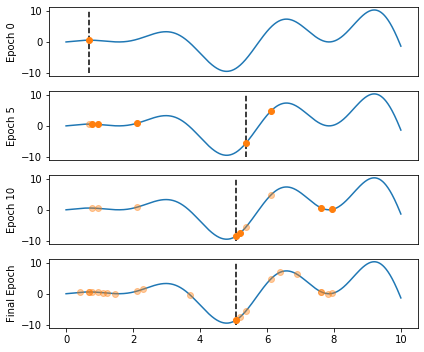

In [152]:
fig, axs = plt.subplots(4, 1, figsize=(6, 5))
ax = axs[0]
ax.plot(xs, f_vals, label='Function')
ax.vlines(x_guesses[1], -10, 10, label='Best Guess', linestyle='dashed')
ax.plot(x_guesses[1], objective(x_guesses[1]), 'o', label='Current Guess')
ax.set_xticks([])
ax.set_ylabel('Epoch 0')

ax = axs[1]
ax.plot(xs, f_vals, label='Function')
ax.plot(x_guesses[1], f_guesses[1], 'o', label='Old Guesses', alpha=0.4)
ax.plot(x_guesses[2:7], f_guesses[2:7], 'o', label='Guesses', color='tab:orange')
best_guess_index = f_guesses[1:7].index(np.min(f_guesses[1:7])) +1 
ax.vlines(x_guesses[best_guess_index], -10, 10, label='Best Guess', linestyle='dashed')
ax.set_xticks([])
ax.set_ylabel('Epoch 5')

ax=axs[2]
ax.plot(xs, f_vals, label='Function')
ax.plot(x_guesses[2:7], f_guesses[2:7], 'o', label='Old Guesses', alpha=0.4)
ax.plot(x_guesses[8:12], f_guesses[8:12], 'o', label='Guesses', color='tab:orange')
best_guess_index = f_guesses[1:12].index(np.min(f_guesses[1:12])) +1
ax.vlines(x_guesses[best_guess_index], -10, 10, label='Best Guess', linestyle='dashed')
ax.set_xticks([])
ax.set_ylabel('Epoch 10')

ax=axs[3]
ax.plot(xs, f_vals, label='Function')
ax.plot(x_guesses[2:], f_guesses[2:], 'o', label='Old Guesses', alpha=0.4)
best_guess_index = f_guesses[2:].index(np.min(f_guesses[2:])) + 2
ax.vlines(x_guesses[best_guess_index], -10, 10, label='Best Guess', linestyle='dashed')
ax.plot(x_guesses[best_guess_index], f_guesses[best_guess_index], 'o', label='Best Guess', color='tab:orange')
ax.set_ylabel('Final Epoch')
fig.tight_layout()

Text(0.5, 0, 'Number of Iterations')

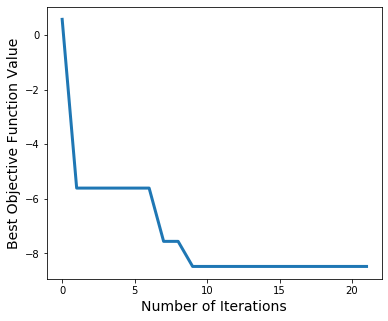

In [163]:
best_loss = 1E10
best_losses = []
for i in range(len(f_guesses[1:])):
    if f_guesses[i+1] < best_loss:
        best_loss = f_guesses[i+1]
    best_losses.append(best_loss)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(best_losses, linewidth=3)
ax.set_ylabel('Best Objective Function Value', fontsize=14)
ax.set_xlabel('Number of Iterations', fontsize=14)

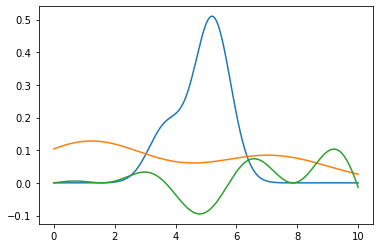

In [205]:
gamma = 0.25
end_index = 20
data = pd.DataFrame({'x':x_guesses[1:end_index], 'f':f_guesses[1:end_index]})
data = data.sort_values(by='f').reset_index(drop=True)
good_guesses = data.x[:int(len(data)*gamma)]
bad_guesses = data.x[int(len(data)*gamma):]

good_kernel = gaussian_kde(good_guesses)
bad_kernel = gaussian_kde(bad_guesses)
good_dist = good_kernel(xs)
bad_dist = bad_kernel(xs)
plt.plot(xs, good_dist)
plt.plot(xs, bad_dist)
plt.plot(xs, f_vals/100, label='Function')

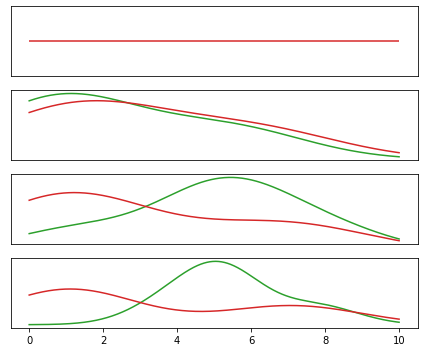

In [225]:
fig, axs = plt.subplots(4, 1, figsize=(6, 5))
ax=axs[0]
ax.set_xticks([])
ax.hlines(0.5, 0, 10, color='tab:red')
ax.set_yticks([])

ax=axs[1]
gamma = 0.5
end_index = 7
data = pd.DataFrame({'x':x_guesses[1:end_index], 'f':f_guesses[1:end_index]})
data = data.sort_values(by='f').reset_index(drop=True)
good_guesses = data.x[:int(len(data)*gamma)]
bad_guesses = data.x[int(len(data)*gamma):]
good_kernel = gaussian_kde(good_guesses)
bad_kernel = gaussian_kde(bad_guesses)
good_dist = good_kernel(xs)
bad_dist = bad_kernel(xs)
ax.plot(xs, good_dist, color='tab:green')
ax.plot(xs, bad_dist, color='tab:red')
ax.set_xticks([])
ax.set_yticks([])

ax=axs[2]
gamma = 0.5
end_index = 12
data = pd.DataFrame({'x':x_guesses[1:end_index], 'f':f_guesses[1:end_index]})
data = data.sort_values(by='f').reset_index(drop=True)
good_guesses = data.x[:int(len(data)*gamma)]
bad_guesses = data.x[int(len(data)*gamma):]
good_kernel = gaussian_kde(good_guesses)
bad_kernel = gaussian_kde(bad_guesses)
good_dist = good_kernel(xs)
bad_dist = bad_kernel(xs)
ax.plot(xs, good_dist, color='tab:green')
ax.plot(xs, bad_dist, color='tab:red')
ax.set_xticks([])
ax.set_yticks([])

ax=axs[3]
gamma = 0.25
end_index = len(x_guesses)
data = pd.DataFrame({'x':x_guesses[1:end_index], 'f':f_guesses[1:end_index]})
data = data.sort_values(by='f').reset_index(drop=True)
good_guesses = data.x[:int(len(data)*gamma)]
bad_guesses = data.x[int(len(data)*gamma):]

good_kernel = gaussian_kde(good_guesses)
bad_kernel = gaussian_kde(bad_guesses)
good_dist = good_kernel(xs)
bad_dist = bad_kernel(xs)
ax.plot(xs, good_dist, color='tab:green')
ax.plot(xs, bad_dist, color='tab:red')
ax.set_yticks([])

fig.tight_layout()

In [133]:
ax.plot(best_losses, 'k-', alpha=0.5)
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_ylabel('Loss Value', fontsize=14)
ax.set_xlabel('Number of Iterations', fontsize=14)
sns.scatterplot(range(len(landscape)), best_losses, hue=best_loss_circuits,  ax=ax)

(x_guesses)

34

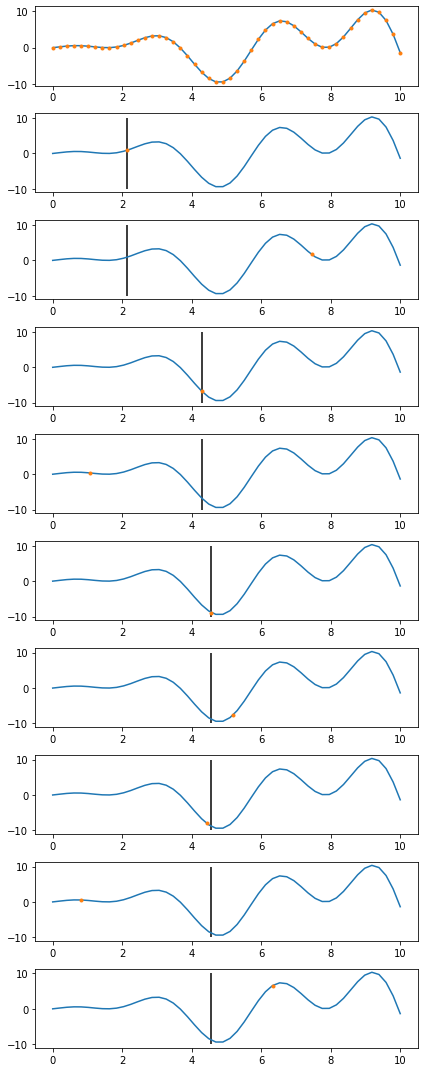

In [80]:
# num_axes = 10
# fig, axs = plt.subplots(num_axes, 1, figsize=(6, 15))
# for i in range(num_axes):
#     ax = axs[i]
#     ax.plot(xs, f_vals, label='Function')
#     #ax.plot(x_guesses[i], objective(x_guesses[i]), '.', label='Parameter Guess')
#     if i != 0:
#         best_guess = np.min(f_guesses[1:i+1])
#         #ax.plot(x_guesses[f_guesses[1:i+1].index(best_guess)+1], best_guess, '.', label='Best Guess So Far')
#         ax.vlines(x_guesses[f_guesses[1:i+1].index(best_guess)+1], -10, 10)

# plt.tight_layout()